In [5]:
import sys
sys.path.append('../src')
from utils import *
import pandas as pd

df = getDF('../../project/Sports_and_Outdoors_5.json')

In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'name',
       'reviewText', 'summary', 'unixReviewTime', 'style', 'vote', 'image'],
      dtype='object')

In [7]:
df.head() ['unixReviewTime']

0    1433289600
1    1427846400
2    1421107200
3    1419292800
4    1418601600
Name: unixReviewTime, dtype: int64

In [8]:
df['reviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df['reviewTime']

0         2015-06-03
1         2015-04-01
2         2015-01-13
3         2014-12-23
4         2014-12-15
             ...    
2839935   2018-04-05
2839936   2018-03-01
2839937   2018-03-17
2839938   2017-10-28
2839939   2017-06-11
Name: reviewTime, Length: 2839940, dtype: datetime64[ns]

In [9]:
df['reviewTime'].dt.year

0          2015
1          2015
2          2015
3          2014
4          2014
           ... 
2839935    2018
2839936    2018
2839937    2018
2839938    2017
2839939    2017
Name: reviewTime, Length: 2839940, dtype: int64

<Axes: >

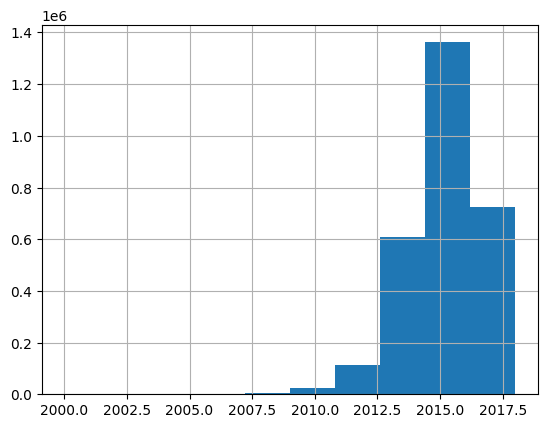

In [10]:
# Plot distribution of dates    
df['reviewTime'].dt.year.hist()

In [11]:
# Print max years
df['reviewTime'].dt.year.max()

2018

In [12]:
# Count number of reviews per year
count = df['reviewTime'].dt.year.value_counts()
count.sort_index(inplace=True)
count

2000         1
2001         1
2002         5
2003        17
2004        28
2005       130
2006       507
2007      1805
2008      4081
2009      8038
2010     16075
2011     36521
2012     77363
2013    218023
2014    389390
2015    622804
2016    739220
2017    521759
2018    204172
Name: reviewTime, dtype: int64

In [13]:
# Sum the number of reviews for years 2016-2018
count[-3:].sum()

1465151

In [14]:
# From the data frame, keep only reviews from 2016-2018
df = df[df['reviewTime'].dt.year >= 2016]
df.head()

,overall,verified,reviewTime,reviewerID,asin,name,reviewText,summary,unixReviewTime,style,vote,image
6,5.0,False,2017-02-07,ANGLIGXJHXC6D,0899332757,Amazon Customer,So cool,So cool,1486425600,{'Format:': ' Paperback'},NaN,NaN
7,5.0,True,2016-12-27,ASAE9FBGAJQAH,0899332757,Joseph Micallef,Arrived on time. Nice Atlas - Easy to read.,Nice Atlas - Easy to read,1482796800,{'Format:': ' Paperback'},NaN,NaN
8,3.0,True,2016-12-12,A1TAW91SQSU2AH,0899332757,jordan s moore,More of a road map than a useful topographical...,Mostly a road atlas. Well layed out and organ...,1481500800,{'Format:': ' Paperback'},NaN,NaN
9,5.0,True,2016-08-13,A1SVGO4GMEOXQ0,0899332757,Gregory Mahnken,Comprehensive atlas. Very happy with how much ...,Very happy with how much detail is in here,1471046400,{'Format:': ' Paperback'},NaN,NaN
10,5.0,True,2016-08-02,A36QT6N7N0GF3O,0899332757,Love is all I have,Delorme has always made the best book maps in ...,Five Stars,1470096000,{'Format:': ' Paperback'},NaN,NaN


True     1366265
False      98886
Name: verified, dtype: int64


<Axes: >

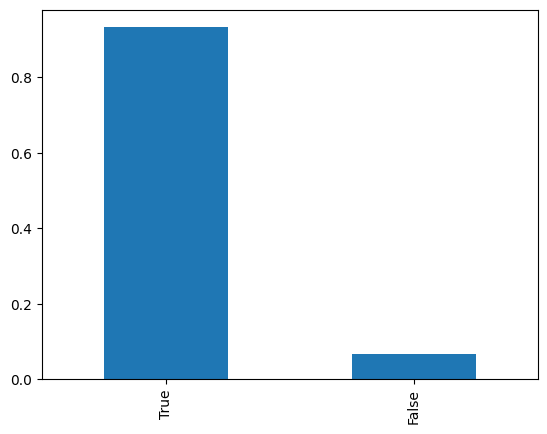

In [15]:
# Plot the proportion of 'verified' reviews
print(df['verified'].value_counts())
df['verified'].value_counts(normalize=True).plot(kind='bar')

In [16]:
# Drop review that are not verified
df = df[df['verified'] == True]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366265 entries, 7 to 2839939
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   overall         1366265 non-null  float64       
 1   verified        1366265 non-null  bool          
 2   reviewTime      1366265 non-null  datetime64[ns]
 3   reviewerID      1366265 non-null  object        
 4   asin            1366265 non-null  object        
 5   name            1366157 non-null  object        
 6   reviewText      1365428 non-null  object        
 7   summary         1365836 non-null  object        
 8   unixReviewTime  1366265 non-null  int64         
 9   style           833105 non-null   object        
 10  vote            130472 non-null   object        
 11  image           34211 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 126.4+ MB


In [17]:
# Count the number of reviews per reviewer
reviewer_count = df['reviewerID'].value_counts()
reviewer_count

ASWTGWOE7YB9T     186
A2MR7JGGFD394J    155
A2L5D2ZY6GVBFA    150
AH7N6S0PXB918     129
AV0B6NGGOAISO     123
                 ... 
A314N4ZW9GM045      1
A2RGIK8XN052ZT      1
A284T8UWDFARD7      1
A34VWX657LS4CS      1
A3TN0U64HONOPB      1
Name: reviewerID, Length: 262085, dtype: int64

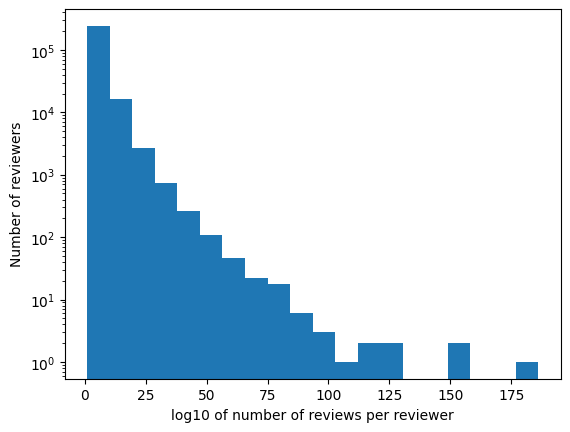

In [18]:
# Plot the distribution of the number of reviews per reviewer  log scale with matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.hist(reviewer_count, bins=20)
plt.xlabel('log10 of number of reviews per reviewer')
plt.ylabel('Number of reviewers')
plt.yscale('log')
plt.show()


In [19]:
# Drop image, vote, verified columns
df.drop(['image', 'vote', 'verified', 'name', 'summary', 'style'], axis=1, inplace=True)
df.head()

,overall,reviewTime,reviewerID,asin,reviewText,unixReviewTime
7,5.0,2016-12-27,ASAE9FBGAJQAH,0899332757,Arrived on time. Nice Atlas - Easy to read.,1482796800
8,3.0,2016-12-12,A1TAW91SQSU2AH,0899332757,More of a road map than a useful topographical...,1481500800
9,5.0,2016-08-13,A1SVGO4GMEOXQ0,0899332757,Comprehensive atlas. Very happy with how much ...,1471046400
10,5.0,2016-08-02,A36QT6N7N0GF3O,0899332757,Delorme has always made the best book maps in ...,1470096000
12,5.0,2016-07-14,AJGZDX7KC5TVQ,0899332757,worked great on the trip around ny,1468454400


In [21]:
# Save the data frame to a csv file
df.to_csv('../../project/Sports_and_Outdoors_5_2016_2018.csv', index=False)